In [15]:
from configure import GlobalVariable

gvar = GlobalVariable()
print gvar
gvar.arch_feats.shape

from linecache_light import LineCache
data_pair = LineCache('static/dataset/data_pair.json')
print data_pair.num_lines

19207


In [18]:
import json
import os
from PIL import Image

def findImgByIndex(index):
    sentence_id = gvar.sentence_ids[index]
    data = json.loads(data_pair[sentence_id])
    filename = [image for image in data['images'] if image['image_id'] == index][0]['image_name'] 
    filename = os.path.join('static/dataset/' + data['poster'],filename)
    img = Image.open(filename).convert('RGB')
    return img

In [6]:
%%time
from sklearn.cluster import KMeans

model = KMeans(n_clusters=50, n_jobs=10, verbose=False)
print model

results = model.fit(gvar.arch_feats[0:50000])
print results.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
[16 32 21 ...,  3 26 16]
CPU times: user 2.18 s, sys: 264 ms, total: 2.44 s
Wall time: 1min 2s


In [26]:
cluster_id = -1

1 32


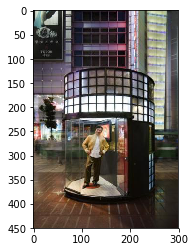

19 32


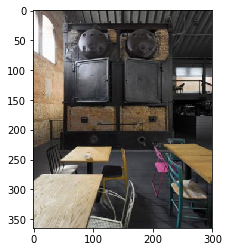

65 32


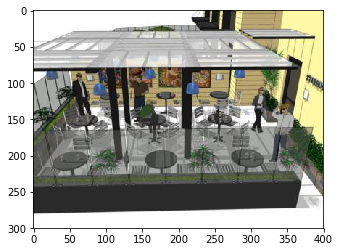

67 32


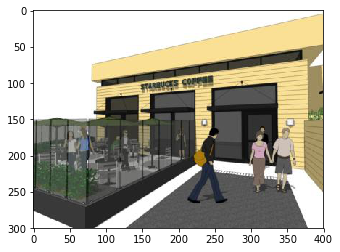

238 32


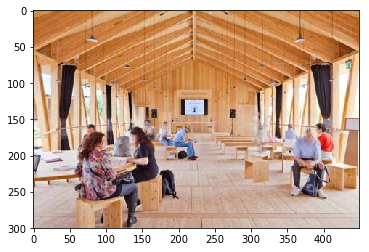

296 32


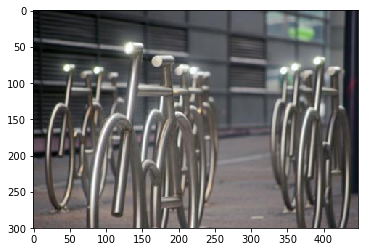

299 32


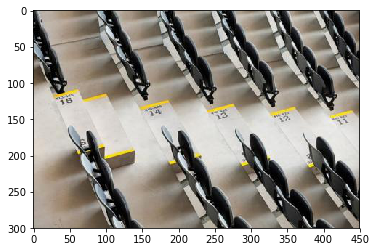

478 32


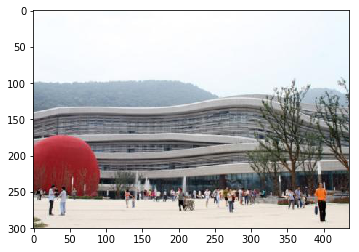

830 32


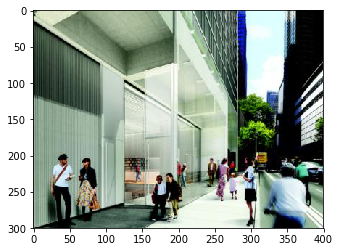

845 32


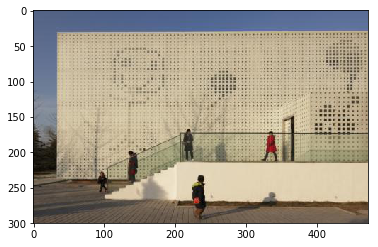

959 32


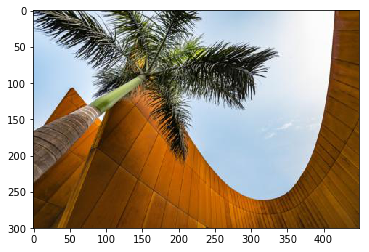

972 32


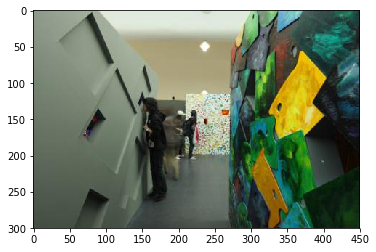

984 32


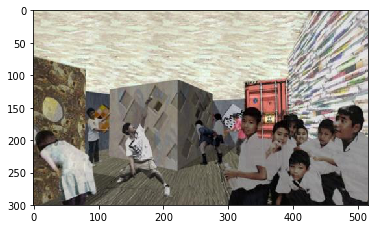

988 32


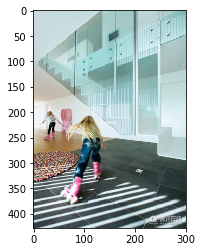

1062 32


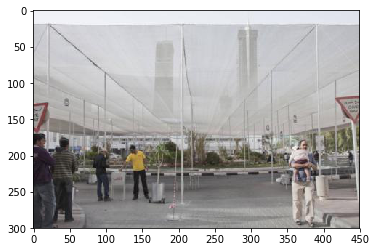

1091 32


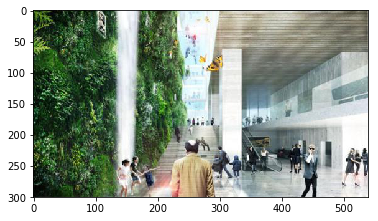

1096 32


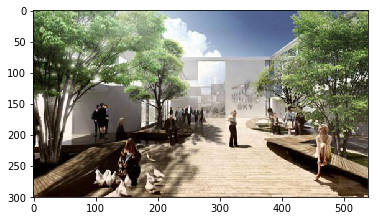

1099 32


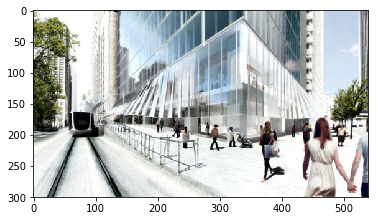

1101 32


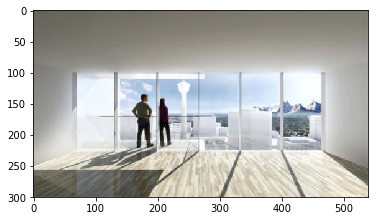

1104 32


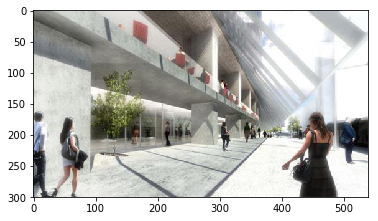

1108 32


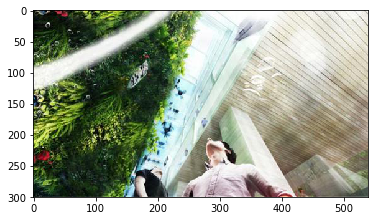

1141 32


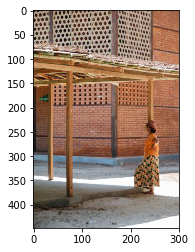

1162 32


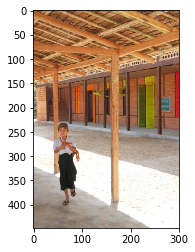

1217 32


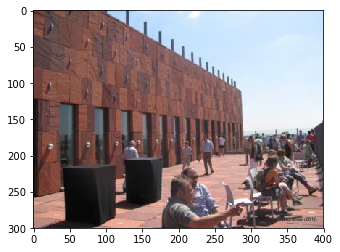

1218 32


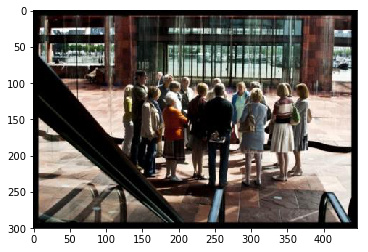

1229 32


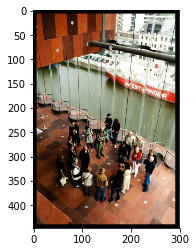

1231 32


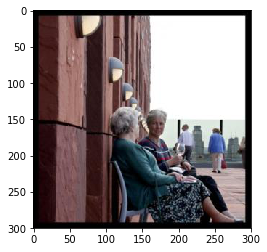

1244 32


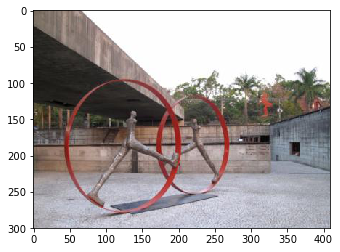

1302 32


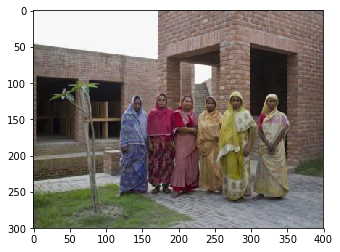

1436 32


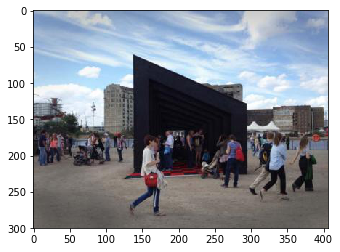

1629 32


In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

count = 0
cluster_id += 1

plt.figure()
for i in range(50000):
    if results.labels_[i] == cluster_id:
        print i, cluster_id
        count += 1
        if count > 30:
            break
        img = findImgByIndex(i)
        plt.imshow(img)
        plt.show()